### Data Importation and EDA

In [ ]:
# uncomment this just the first time to download the following library inside the ml_venv
"""
! pip install seaborn
"""

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns # statistical visualizations and aesthetics
import matplotlib.pyplot as plt


#data
# Load the Boston dataset directly from its source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None) # Note: r transform the content as a "raw string" making clear to Python that the string is a regular expression.
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

"""
 Features:
    CRIM     per capita crime rate by town
    ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS    proportion of non-retail business acres per town
    CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    NOX      nitric oxides concentration (parts per 10 million)
    RM       average number of rooms per dwelling
    AGE      proportion of owner-occupied units built prior to 1940
    DIS      weighted distances to five Boston employment centres
    RAD      index of accessibility to radial highways
    TAX      full-value property-tax rate per $10,000
    PTRATIO  pupil-teacher ratio by town
    B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT    % lower status of the population
"""

boston_df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
boston_df['Price'] = target
#preview
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<Axes: >

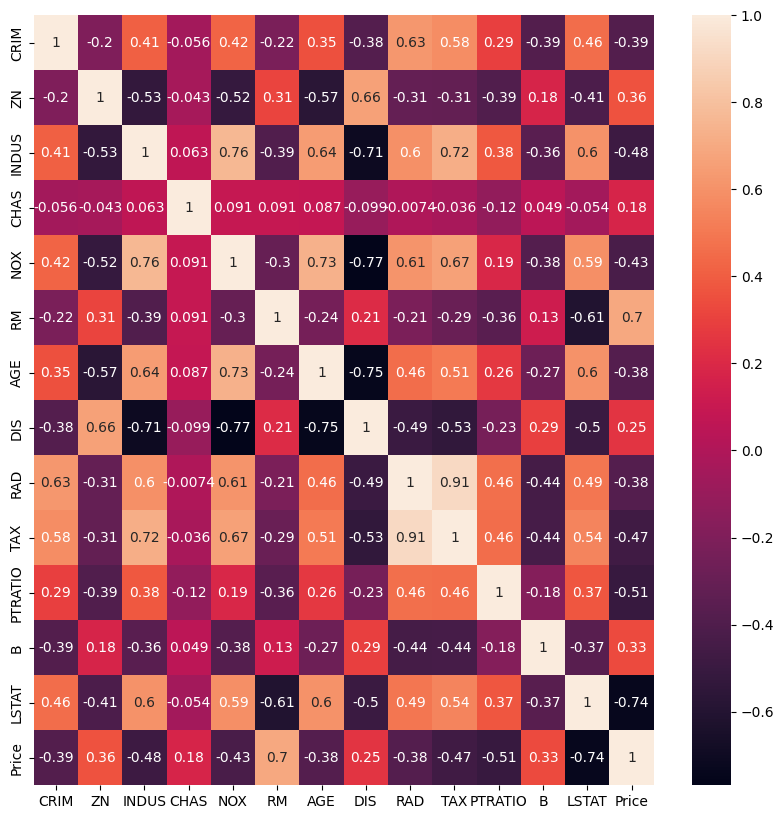

In [8]:
#Exploration
plt.figure(figsize = (10, 10))

## Let's plot the correlation between our features as a heatmap
sns.heatmap(boston_df.corr(), annot = True)

### Heatmap for Correlation Analysis

The command `sns.heatmap(boston_df.corr(), annot=True)` generates a heatmap to visualize the pairwise correlation coefficients between all the features in the `boston_df` DataFrame.

#### 1. `boston_df.corr()`
This calculates the correlation matrix for the DataFrame `boston_df`.  
A correlation matrix is a square table where:
- Each row and column corresponds to a feature in the dataset.
- Each cell contains the **correlation coefficient (𝜌)** between two features.
- Values range from **-1** to **+1**:
  - **+1**: Perfect positive correlation (as one feature increases, the other increases).
  - **-1**: Perfect negative correlation (as one feature increases, the other decreases).
  - **0**: No correlation (the features are not **linearly** dependent).


**Important**: The correlation matrix measures only **linear** relationships between two variables, it does not capture non-linear associations. Therefore, if there are complex non-linear relationships between two features, the correlation matrix will not reflect that.

A correlation of zero does not imply that the variables are independent, just that they do not have a linear relationship. -> **Zero correlation does not necessarily imply independence**

#### 2. `sns.heatmap()`
This function from the Seaborn library creates a heatmap (a graphical representation of the correlation matrix) where:
- Colors represent the magnitude and direction of correlations.
- Darker or more intense colors indicate stronger correlations (positive or negative).

---

### What Does It Do?

This visualization helps quickly identify patterns of correlation, which is crucial for detecting **multicollinearity**.

#### What is Multicollinearity?

Multicollinearity occurs when two or more features in a dataset are highly correlated with each other, which can lead to:
- Instability in regression models (coefficients become unreliable).
- Difficulty interpreting the impact of individual features on the target variable.

**A common threshold for identifying problematic multicollinearity:**
- Correlation coefficient (𝜌) greater than **0.8** or **0.9** between two features.

### How to Use the Heatmap to Detect Multicollinearity

1. **Look for High Correlation Values:**
   - Find cells in the heatmap with high values (e.g., **0.91** for `TAX` and `RAD`).
   - These indicate strong correlations, meaning the features are redundant and might lead to multicollinearity.
   
2. **Identify Redundant Features:**
   - Features that are highly correlated may convey the same information.
   - For example, if `TAX` and `RAD` are highly correlated, you might consider keeping only one of them.
   
3. **Interpret Positive vs Negative Correlations:**
   - **Positive correlation**: Both features increase together (e.g., `INDUS` and `NOX` with **𝜌 > 0**).
   - **Negative correlation**: One feature increases while the other decreases (e.g., `DIS` and `NOX` with **𝜌 < 0**).
   
4. **Exclude Non-Correlated Features (if relevant):**
   - Features with near-zero correlation with the target variable (like `CHAS`) may not significantly contribute to the model and can be candidates for removal.

---

#### Practical Example: Detecting Multicollinearity

- In your heatmap:
  - High correlation values (e.g., `TAX` and `RAD`) indicate multicollinearity.  
    These features should not be included together in regression models because they can make the model unstable (Take just one of them!).
  - Low correlation values (e.g., `CHAS` and many others) suggest low linear dependence (with the target variable).  
    This indicates that `CHAS` might not contribute much to predictions and could be excluded if necessary (Remove it!).


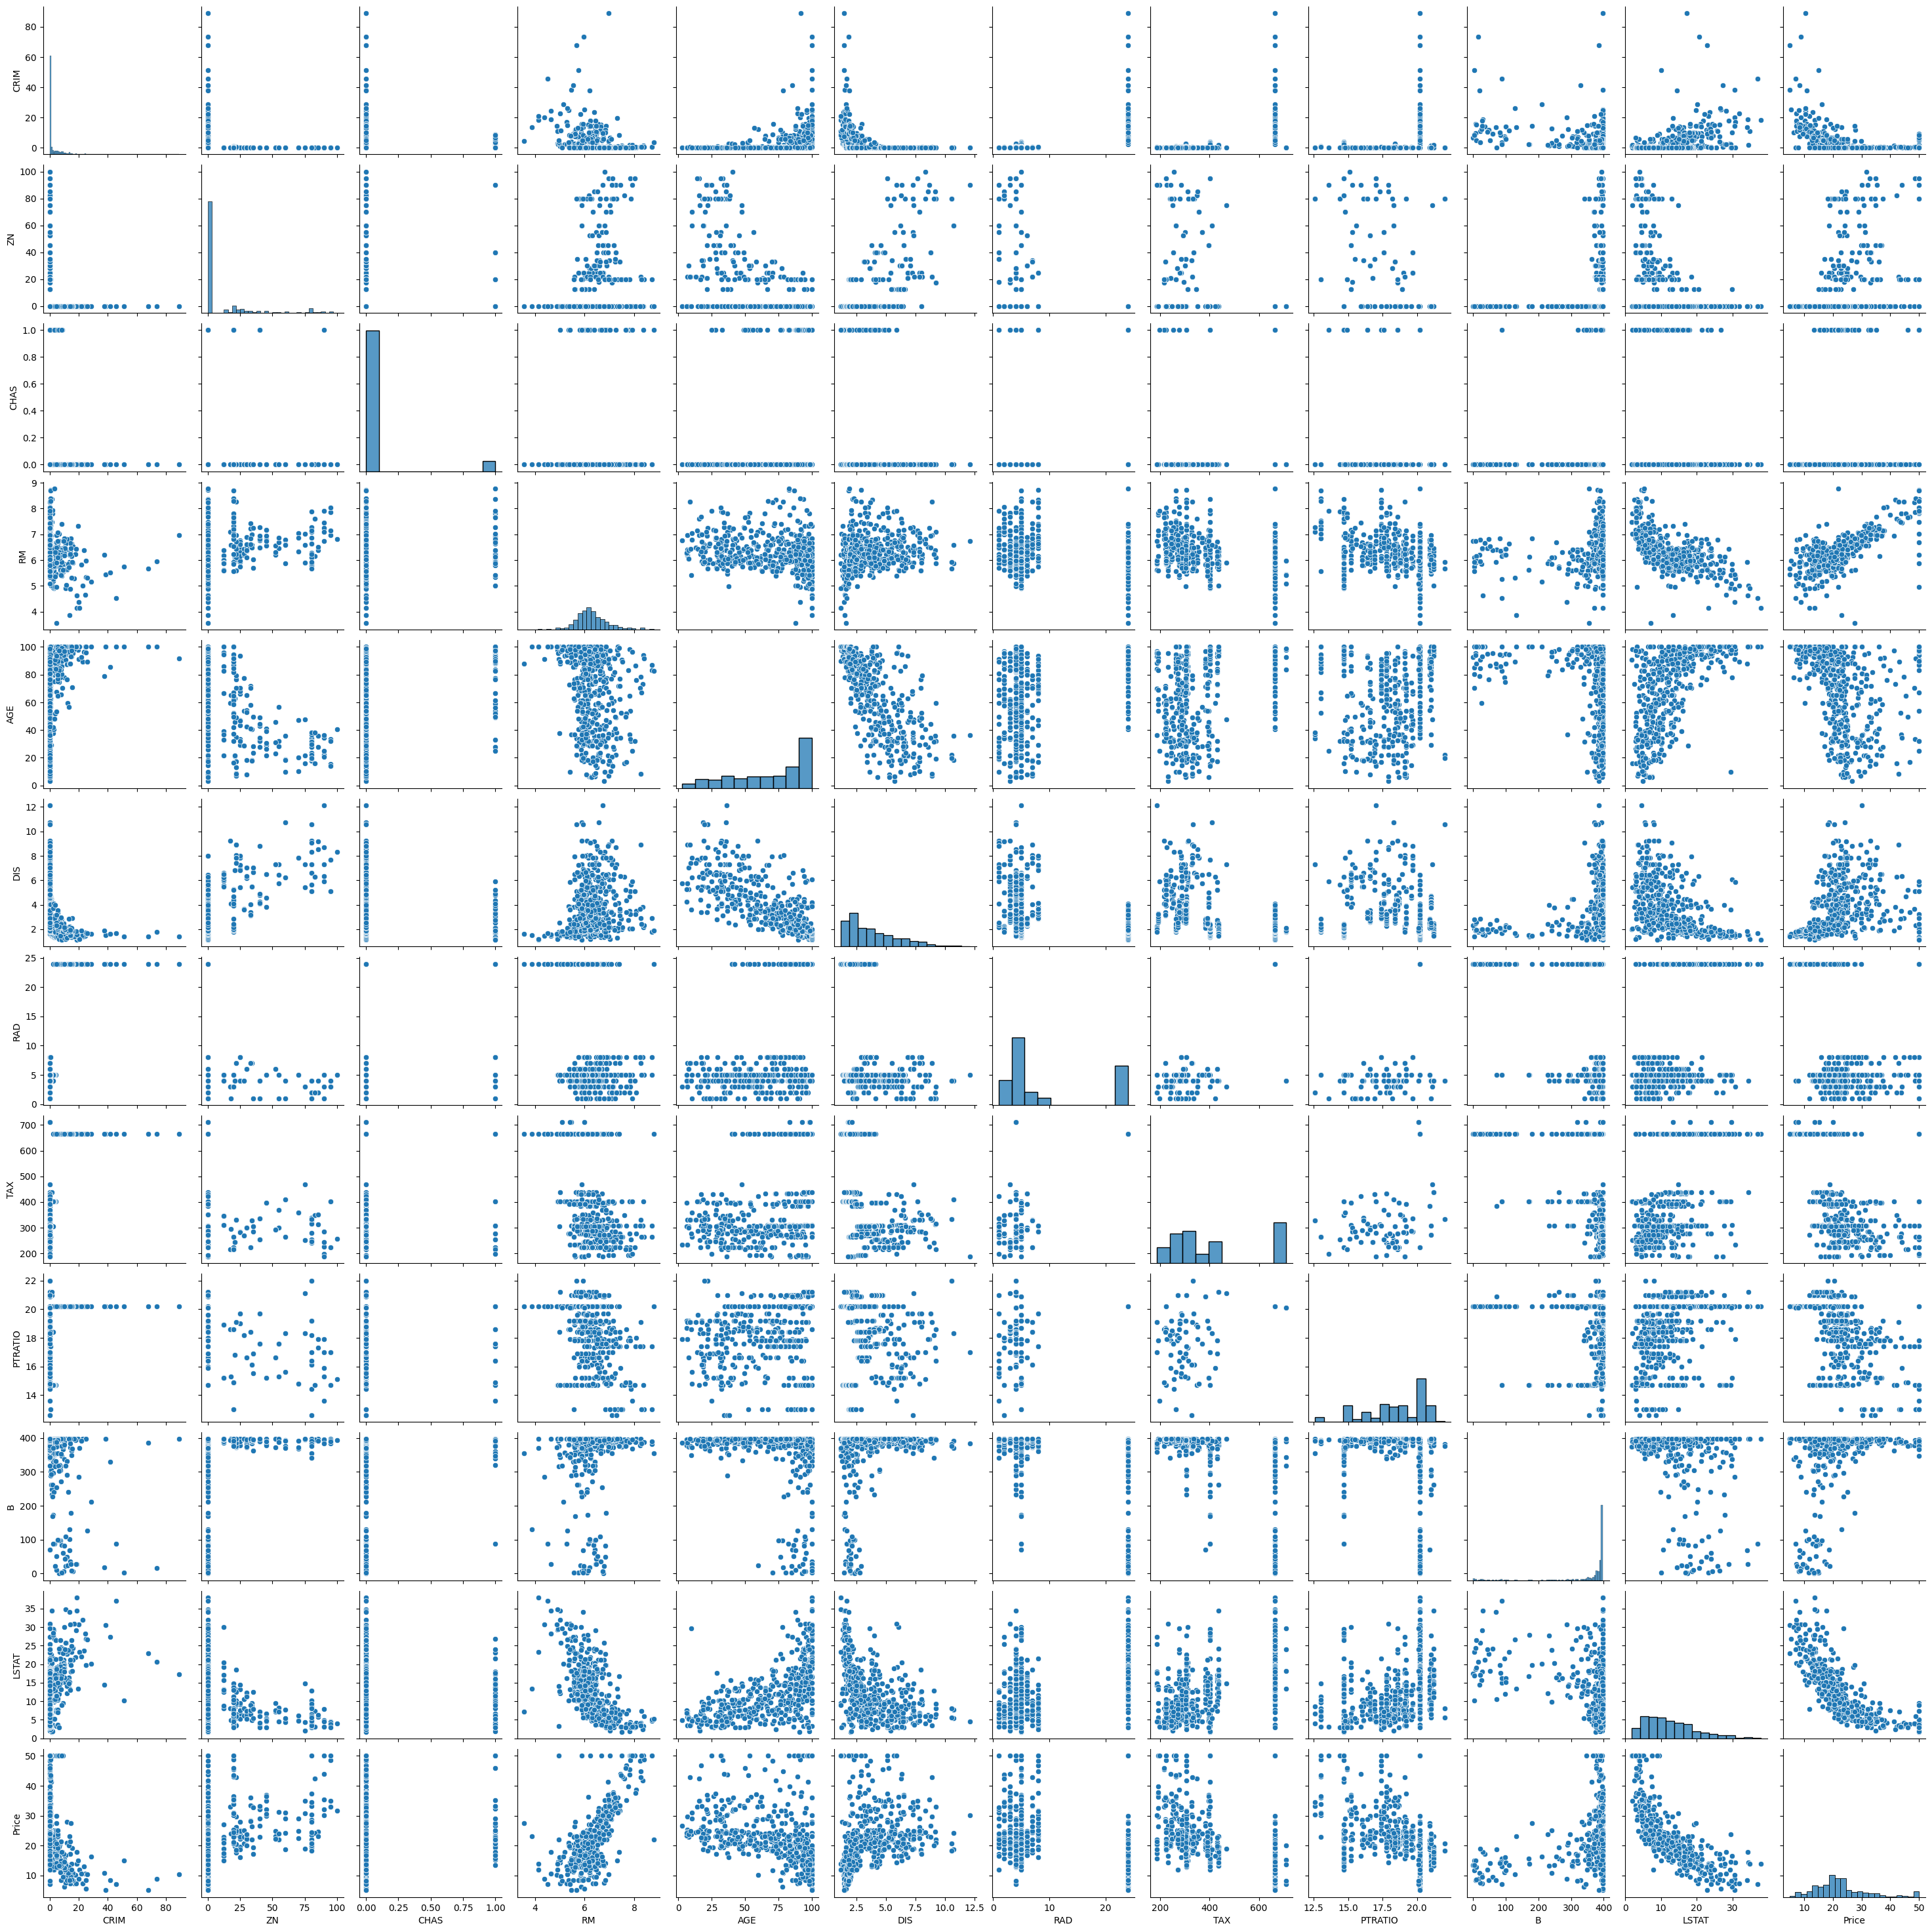

In [9]:
#There are cases of multicolinearity, we will drop a few columns
boston_df.drop(columns = ["INDUS", "NOX"], inplace = True)

#pairplot
sns.pairplot(boston_df)

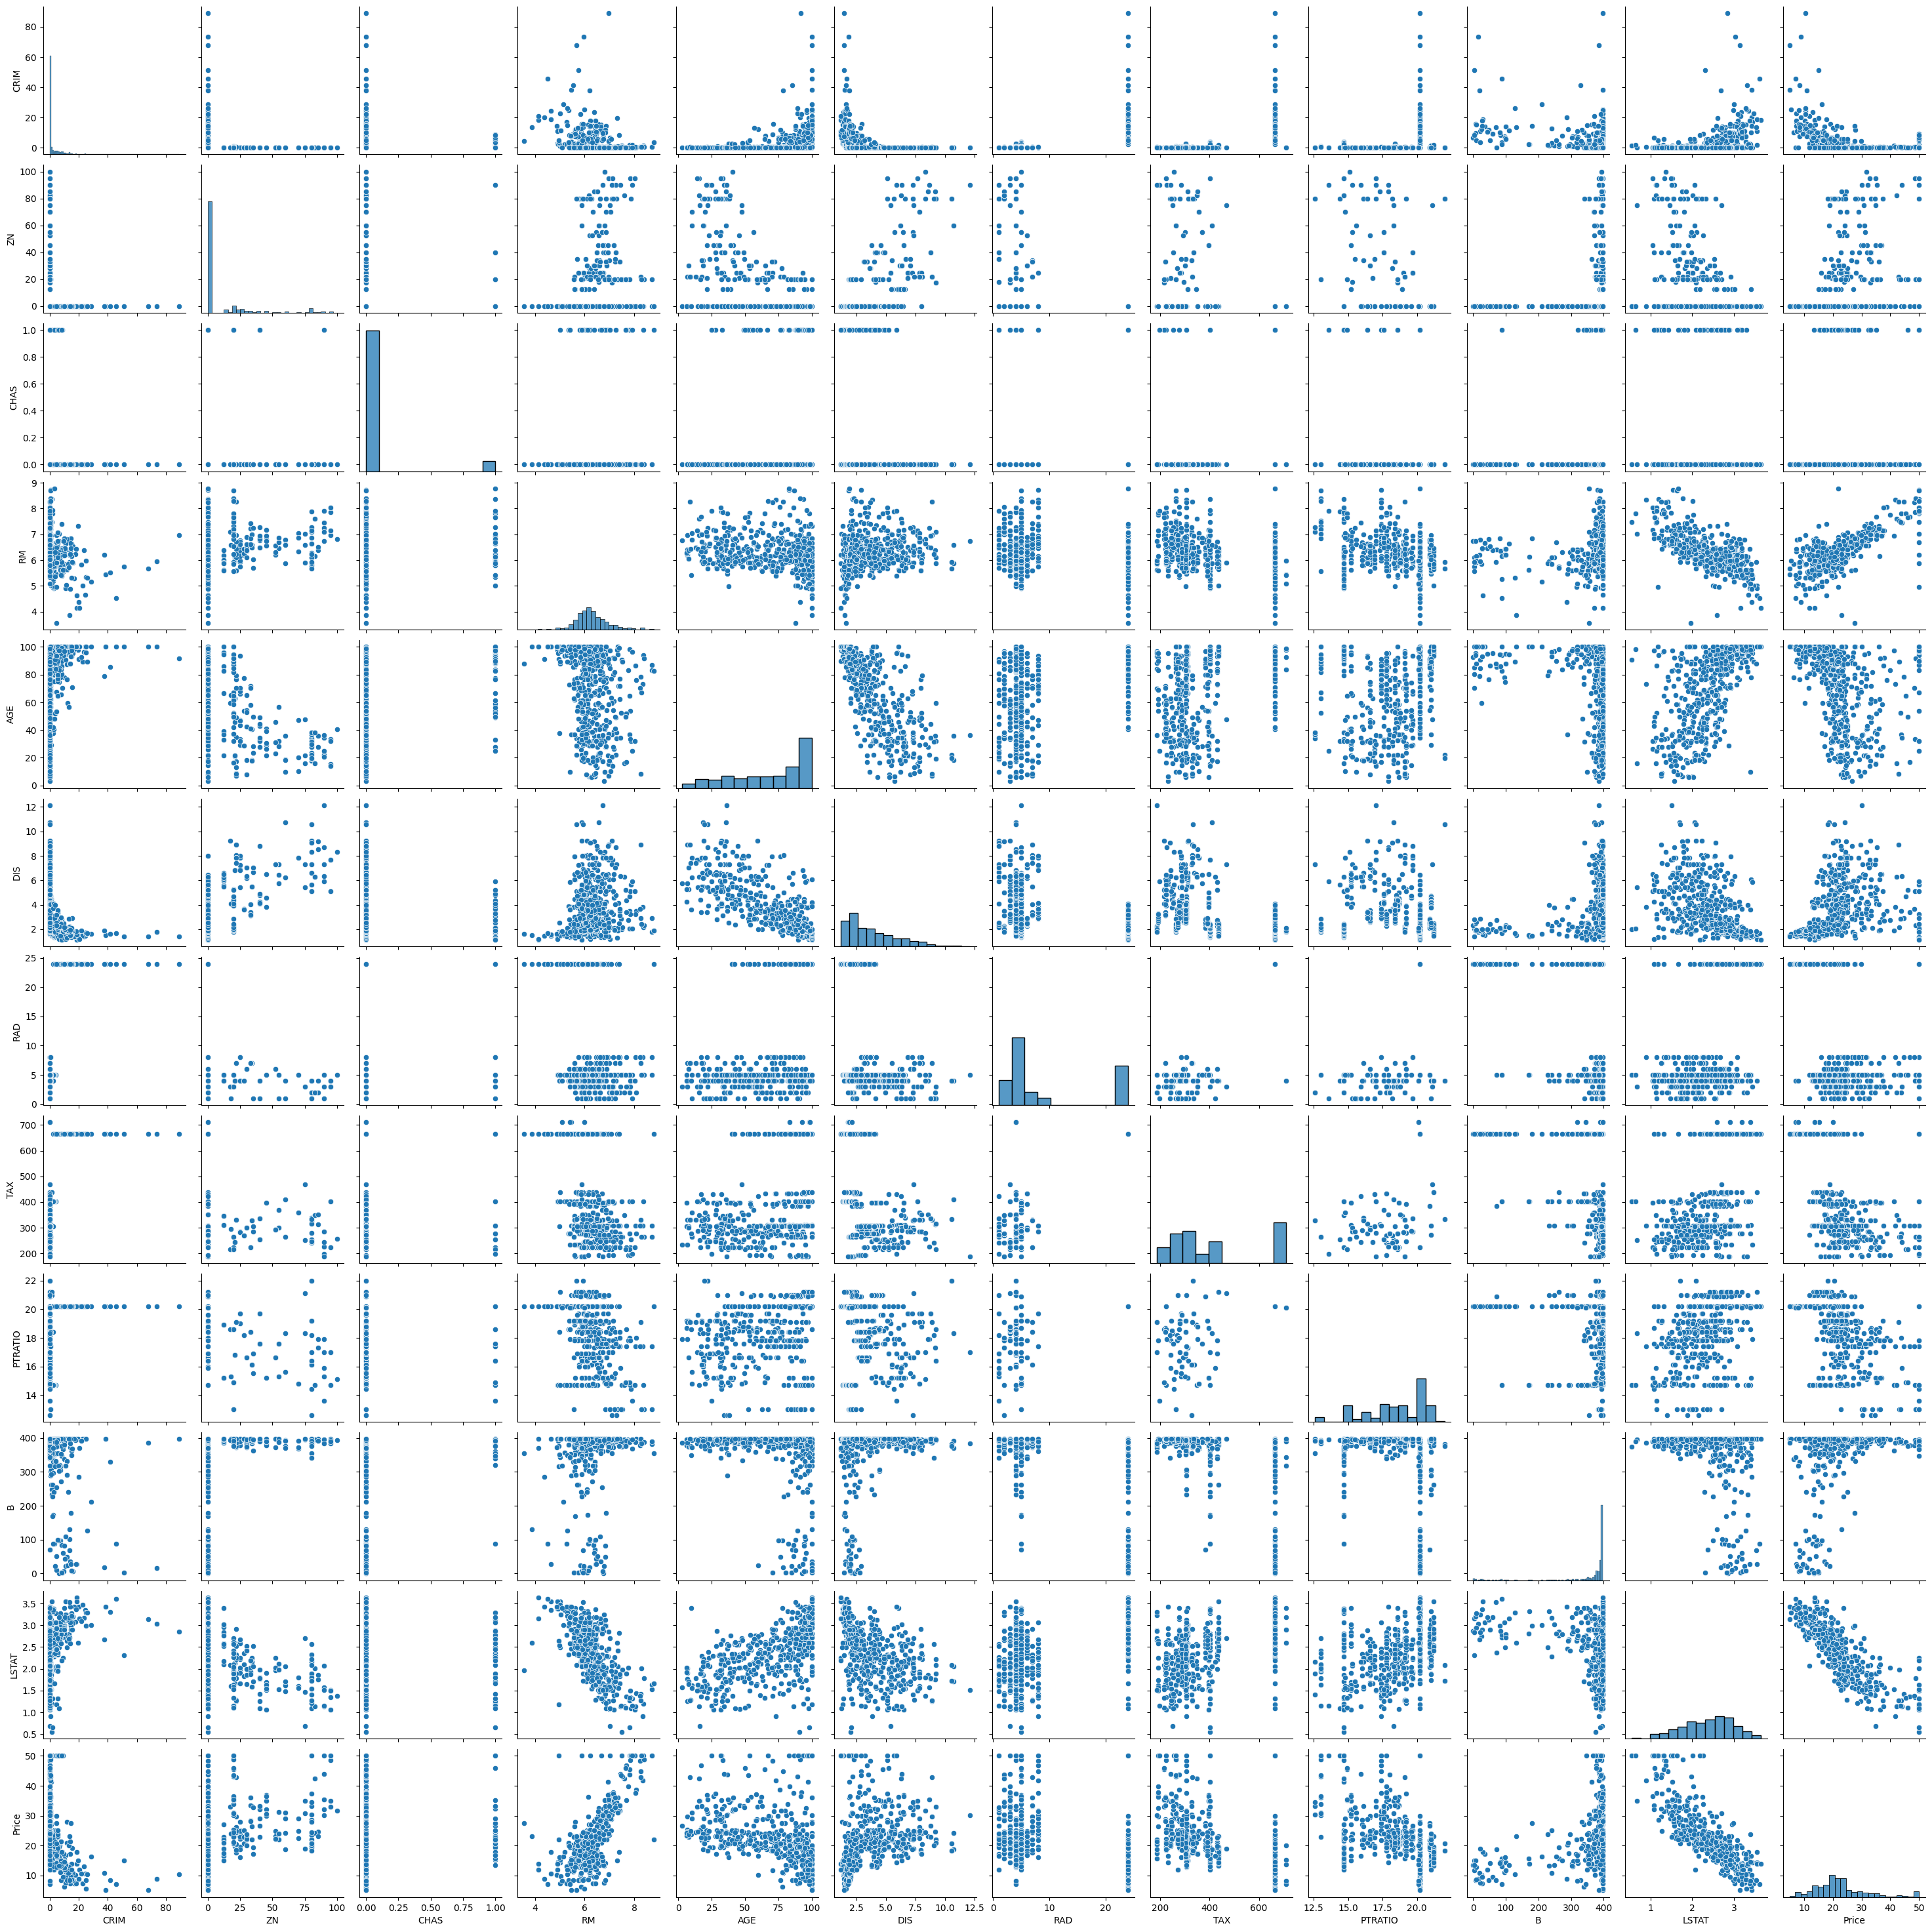

In [10]:
#we will log the LSTAT Column
boston_df.LSTAT = np.log(boston_df.LSTAT)

#pairplot
sns.pairplot(boston_df)